# Lab 8 

#### Ran SPAdes genome assembler from the command line:
spades.py --o Lab8 -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq --pacbio /data/lab8/pacbio_reads.fastq -t

**Why do we expect short reads to produce a more fragmented assembly than long reads?**  
Because it is difficult to distinguish between repeats that occur frequently in the genome, if the overlapping between the reads are not long enough when the reads themselves are short.  
Reference: “New advances in sequence assembly” Genome research vol. 27,5 (2017): xi-xiii.)  

**Why does a single-molecule sequencing like PacBio have a higher error rate than Illumina?**  
Because it allows fewer passes, due to the nature of its polymerase and also the length of the sequencce. Errors occur randomly in single-molecule sequencing. This means that with long sequence, it only allows few passes and there is not enough repetition to achieve the concensus sequence with reduced error rate.  
Reference: Ardui, Simon et al. “Single molecule real-time (SMRT) sequencing comes of age: applications and utilities for medical diagnostics” Nucleic acids research vol. 46,5 (2018): 2159-2168.)

# Lab 9

In [106]:
# import packages
import subprocess
from Bio import SeqIO
import matplotlib.pyplot as plt

In [107]:
#calculate statistics
command = "assembly-stats contigs.fasta scaffolds.fasta"
p = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(p.stderr.decode())
print(p.stdout.decode())


stats for contigs.fasta
sum = 6668871, n = 179, ave = 37256.26, largest = 468307
N50 = 213892, n = 11
N60 = 195508, n = 14
N70 = 148554, n = 18
N80 = 103352, n = 23
N90 = 81820, n = 30
N100 = 128, n = 179
N_count = 0
Gaps = 0
-------------------------------------------------------------------------------
stats for scaffolds.fasta
sum = 6672441, n = 173, ave = 38569.02, largest = 468307
N50 = 261858, n = 10
N60 = 253666, n = 12
N70 = 207869, n = 15
N80 = 124081, n = 20
N90 = 92098, n = 26
N100 = 128, n = 173
N_count = 144
Gaps = 7



    Total length of all contigs: 6668871   
    Total length of all scaffolds: 6672441  
    The number of contigs: 179  
    The number of scaffolds: 173    
    N50 of contigs: 213892   
    N50 of scaffolds: 261858

**Why is N50 is useful statistic to calculate? Why not just list the mean or median contig length? In your assembly, are scaffolds longer than contigs, or are scaffolds approximately equal to contigs?**  
N50 indicates the sequence length of the shortest contig at 50% of the total genome length ([reference](https://en.wikipedia.org/wiki/N50,_L50,_and_related_statistics)). It is a more accurate way to know the general length of contigs in the assembly than the mean of median, which can be distorted if lots of very short contigs or lots of very long contigs are present. In my assembly, it seems scaffolds are longer than contigs, as indicated by their N50 statistic. 

<BarContainer object of 2 artists>

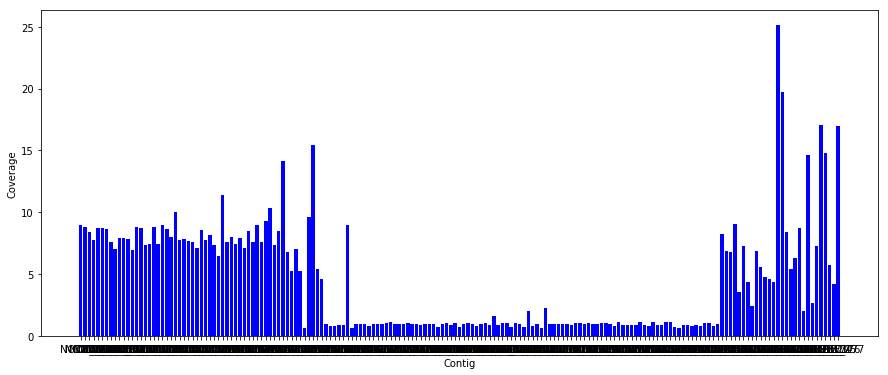

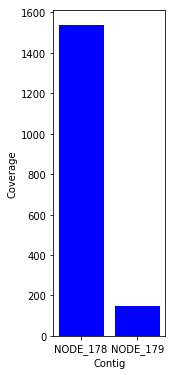

In [112]:
# create list of coverage for each contig
contig_name = []
contig_coverage = []
# extract converage for each contig
for record in SeqIO.parse("contigs.fasta", "fasta"):
    name = record.id.split("_length",1)[0]
    cov = record.id.split("cov_",1)[1]
    contig_name.append(name)
    contig_coverage.append(float(cov))

# plot coverage

plt.figure(figsize=(15,6))
plt.xlabel('Contig')
plt.ylabel('Coverage')

# plot coverage for NODE 1-177
plt.bar(contig_name[0:177], contig_coverage[0:177], color = ['blue'])

plt.figure(figsize=(2,6))
plt.xlabel('Contig')
plt.ylabel('Coverage')

# plot coverage for NODE 178-179
plt.bar(contig_name[177:179], contig_coverage[177:179], color = ['blue'])


**Is coverage uniformly distributed? Does it look Gaussian? Is it bimodal or trimodal?**  
Coverage is uniformly distributed among certain parts. Some extreme values are present at multiple locations.  

**What explains the presence of contigs with coverage an integer multiple of the mean coverage?**
The sequence of the contig is conserved at multiple locations of the genome perhaps. 

In [110]:
# locate 16S ribosomal RNA gene
command = "rna_hmm3.py -i scaffolds.fasta -o 16S_gene.gff"
p = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(p.stderr.decode())
print(p.stdout.decode())

### Manually deleted all the lines other than ones corresponding to 16S gene within file 16S_gene.gff

In [111]:
# extract 16S ribosomal RNA gene sequence
command = "bedtools getfasta -fi contigs.fasta -bed 16S_gene.gff"
p = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print(p.stderr.decode())
print(p.stdout.decode())

index file contigs.fasta.fai not found, generating...
WARNING. chromosome (NODE_6_length_332489_cov_9.062558) was not found in the FASTA file. Skipping.
WARNING. chromosome (NODE_4_length_352739_cov_8.419214) was not found in the FASTA file. Skipping.
WARNING. chromosome (NODE_7_length_327230_cov_9.134087) was not found in the FASTA file. Skipping.
WARNING. chromosome (NODE_21_length_103352_cov_10.011827) was not found in the FASTA file. Skipping.

>NODE_1_length_468307_cov_8.955035:159049-160594
TTTGAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACATGCAAGTCGAGCGGTAGAGAGGTGCTTGCACCTCTTGAGAGCGGCGGACGGGTGAGTAATGCCTAGGAATCTGCCTGGTAGTGGGGGATAACGCTCGGAAACGGACGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGACCTTCGGGCCTTGCGCTATCAGATGAGCCTAGGTCGGATTAGCTAGTTGGTGAGGTAATGGCTCACCAAGGCGACGATCCGTAACTGGTCTGAGAGGATGATCAGTCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGCGAAAGCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGTCTTCGGATTGTAAAGCACTTTAAGTTGGGAGGAAGGGCAGTTACCTAATACGTAATTGTTTTGACGTTACCGACAGAATAAGC

Using [Ribosomal Database Project’s SeqMatch tool](https://rdp.cme.msu.edu/seqmatch/seqmatch_intro.jsp), a genus-level identification was obtained as **Pseudomonas**. The conclusion is based on the result by Ribosomal Database Project’s SeqMatch tool, which compared our sequence with a database of high-quality, curated sequences, obtained from known bacteria and determined that our sequence matched that of Pseudomonas to a level that can conclude it belongs to Pseudomonas.

## Write-Up  
**The annotation was taking forever and it is still not finished. The following write-up is based solely on research.**     
Pseudomonas is a gram negative bacteria that lives in various places, including soil, water and also numerous places in the hospital. It is considered as a pathogen towards human. Localized pseudomonas infections after surgery or burns occur commonly, and can be fatal if not treated carefully. Cancer patients and patient suffered from severe burns are more susceptible to the infection than others. Gentamicin and carbenicillin combined treatment are usually effective for severe cases, while gentamicin, tobramycin, colistin, and amikacin can be used to treat most Pseudomonas strains that have not develop resistance. Based on that, it is unlikely to observe the resistance gene for the antibiotics above, unless it has developed resistance for them by the incorporation of antibiotic resistant plasmids or other.   
Reference: Iglewski BH. Pseudomonas. In: Baron S, editor. Medical Microbiology. 4th edition. Galveston (TX): University of Texas Medical Branch at Galveston; 1996. Chapter 27. Available from: https://www.ncbi.nlm.nih.gov/books/NBK8326/?report=classic